In [4]:
import rasterio
from matplotlib import pyplot
import netCDF4

In [22]:
#src = rasterio.open('/g/data/u46/users/ext547/ewater/cambodia_cube/9_dea_stats/custom/summary_national_30yrs/wofs_14_45_19880101.tif')
src = rasterio.open('/g/data/u46/users/ext547/ewater/input_data/ALOS/N11E105_17_date_F02DAR')

In [27]:
src.units

(None,)

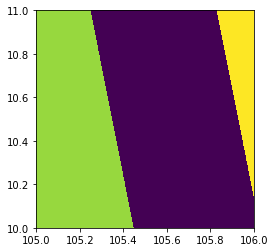

In [4]:
from rasterio.plot import show
# show(src)
show(src.read(), transform=src.transform)

In [24]:
array = src.read()

In [25]:
array

array([[[1194, 1194, 1194, ..., 1231, 1231, 1231],
        [1194, 1194, 1194, ..., 1231, 1231, 1231],
        [1194, 1194, 1194, ..., 1231, 1231, 1231],
        ...,
        [1194, 1194, 1194, ...,  993,  993,  993],
        [1194, 1194, 1194, ...,  993,  993,  993],
        [1194, 1194, 1194, ...,  993,  993,  993]]], dtype=uint16)

TypeError: Invalid dimensions for image data

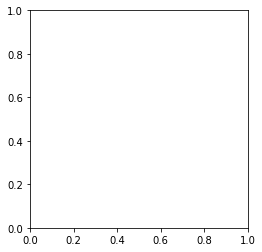

In [43]:
pyplot.imshow(array, cmap='viridis')
pyplot.show()  

In [8]:
from dateutil.parser import parse
import uuid
import os
import rasterio

In [9]:
ds = '/g/data/u46/users/ext547/ewater/input_data/ALOS/N11E100/N11E100_17_sl_HH_F02DAR.nc'
image_path = '/g/data/u46/users/ext547/ewater/input_data/ALOS/N11E100/'

In [10]:
img = rasterio.open(ds)

In [11]:
def get_projection(realpath, path):
    with rasterio.open(os.path.join(str(realpath), str(path))) as img:
        left, bottom, right, top = img.bounds
        spatial_reference = str(str(getattr(img, 'crs_wkt', None) or img.crs.wkt))
        geo_ref_points = {
            'ul': {'x': left, 'y': top},
            'ur': {'x': right, 'y': top},
            'll': {'x': left, 'y': bottom},
            'lr': {'x': right, 'y': bottom},
        }
        return geo_ref_points, spatial_reference

geo_ref_points, spatial_ref = get_projection(image_path, ds)

In [12]:
spatial_ref

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

In [13]:
geo_ref_points

{'ul': {'x': 100.0, 'y': 11.0},
 'ur': {'x': 101.0, 'y': 11.0},
 'll': {'x': 100.0, 'y': 10.000000000000002},
 'lr': {'x': 101.0, 'y': 10.000000000000002}}

In [35]:
projection = 'EPSG:4326'
left, right = 101.875, 109.125
bottom, top = 8.875, 16.125
creation_dt = parse('2018-07-04T16:23:10').isoformat()
results= []

In [17]:
image = netCDF4.Dataset(ds)
times = image['time']
sensing_times = [netCDF4.num2date(time, 
                                      units=times.units, calendar=times.calendar
                                     ).isoformat() for time in times]

In [19]:
projection = 'EPSG:4326'
left, right = 101.875, 109.125
bottom, top = 8.875, 16.125
creation_dt = parse('2018-07-04T16:23:10').isoformat()
results= []
for sensing_time in sensing_times:
    results.append({
        'id': str(uuid.uuid4()),
        'processing_level': 'modelled',
        'product_type': 'rainfall',
        'creation_dt': creation_dt,
        'platform': {'code': 'rain'},
        'instrument': {'name': 'rain gauge'},
        'extent': {
            'coord': {
                'ul': {'lon': left, 'lat': top},
                'ur': {'lon': right, 'lat': top},
                'll': {'lon': left, 'lat': bottom},
                'lr': {'lon': right, 'lat': bottom},
            },
            'from_dt': sensing_time,
            'to_dt': sensing_time,
            'center_dt': sensing_time
        },
        'format': {'name': 'NETCDF'},
        'grid_spatial': {
            'projection': {
                'spatial_reference': projection,
                'geo_ref_points': {
                    'ul': {'x': left, 'y': top},
                    'ur': {'x': right, 'y': top},
                    'll': {'x': left, 'y': bottom},
                    'lr': {'x': right, 'y': bottom},
                }
            }
        },
        'image': {
            'bands': {
                'rainfall': {
                    'path': str(image.filepath()),
                    'layer': 'hqp',
                }
            }
        },
        'lineage': {'source_datasets': {}},
    })

In [20]:
results

[{'id': '14d4f395-aab7-4013-be18-f4e7d0707b8d',
  'processing_level': 'modelled',
  'product_type': 'rainfall',
  'creation_dt': '2018-07-04T16:23:10',
  'platform': {'code': 'rain'},
  'instrument': {'name': 'rain gauge'},
  'extent': {'coord': {'ul': {'lon': 101.875, 'lat': 16.125},
    'ur': {'lon': 109.125, 'lat': 16.125},
    'll': {'lon': 101.875, 'lat': 8.875},
    'lr': {'lon': 109.125, 'lat': 8.875}},
   'from_dt': '1979-01-01T10:30:00',
   'to_dt': '1979-01-01T10:30:00',
   'center_dt': '1979-01-01T10:30:00'},
  'format': {'name': 'NETCDF'},
  'grid_spatial': {'projection': {'spatial_reference': 'EPSG:4326',
    'geo_ref_points': {'ul': {'x': 101.875, 'y': 16.125},
     'ur': {'x': 109.125, 'y': 16.125},
     'll': {'x': 101.875, 'y': 8.875},
     'lr': {'x': 109.125, 'y': 8.875}}}},
  'image': {'bands': {'rainfall': {'path': '/g/data/u46/users/ext547/ewater/input_data/test/PET_WFDEI_197901.nc',
     'layer': 'hqp'}}},
  'lineage': {'source_datasets': {}}},
 {'id': '954dff64-